In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 1. Combing 300 data

In [2]:
# 1. 加载数据
data1 = pd.read_csv('/Applications/hello/Thesis/Classifty/sample_esg_data_suppliment.csv')
data2 = pd.read_csv('/Applications/hello/Thesis/!thesis_new/data_in_process/final_merged_esg_data.csv')
data3 = pd.read_csv('/Applications/hello/Thesis/Classifty/data/esg_300—补充.csv')

# 2. 获取 `esg_300—补充.csv` 中的公司列表
# 假设公司列的名称为 'Company'
company_list = data3['Type'].unique()
print("Company list length:", len(company_list))

# 3. 过滤其他数据集中属于这 300 个公司的数据
filtered_data1 = data1[data1['Type'].isin(company_list)]
filtered_data2 = data2[data2['Type'].isin(company_list)]

# 4. 合并过滤后的数据
# 如果需要将两个过滤后的数据集合并在一起，可以使用 pd.concat
merged_data = pd.merge(filtered_data1, filtered_data2, on='Type', how='outer')

# 5. 保存最终结果
merged_data.to_csv('filtered_esg_data.csv', index=False)

print("Filtered data saved to '300_esg_data_1.csv'")

Company list length: 300
Filtered data saved to '300_esg_data_1.csv'


In [4]:
deleted_data = pd.read_csv('/Applications/hello/Thesis/Classifty/data/300_补充数据（删除）.csv')

In [5]:
merged_data = pd.merge(merged_data, deleted_data, on='Type', how='outer')

In [7]:
merged_data.shape
merged_data.to_csv('300esg', index=False)

# 2. Combing all the esg data

## 2.1 combing asia data

In [15]:
# economic 
data1 = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_environment.csv')
data2 = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx_Global_1800_environment_feature.csv')
data3 = pd.concat([data1, data2], axis=0)
data3.to_csv('stoxx_environment.csv', index=False)

In [19]:
# social_asia
data_social1_asia = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_social1.csv')
data_social2_asia = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_social2.csv')
data_social_asia = pd.merge(data_social1_asia, data_social2_asia, on='Type', how='outer')
data_social_asia.to_csv('stoxx_social_asia.csv', index=False)

In [21]:
# social_EU_US
data_social1_eu_us = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx Global 1800_social_feature.csv')
data_social2_eu_us = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx Global 1900_social2.csv')
data_social_eu_us = pd.merge(data_social1_eu_us, data_social2_eu_us, on='Type', how='outer')
data_social_eu_us.to_csv('stoxx_social_eu_us.csv', index=False)

(1198, 32)

In [24]:
# combing social data
data_social_1800 = pd.concat([data_social_asia, data_social_eu_us], axis=0)
data_social_1800.shape
data_social_1800.to_csv('stoxx_social.csv', index=False)

In [26]:
# governance_asia
data_gov1_asia = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_governance 1.csv')
data_gov2_asia = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_governance2.csv')
data_gov_asia = pd.merge(data_gov1_asia, data_gov2_asia, on='Type', how='outer')
data_gov_asia.shape
data_gov_asia.to_csv('stoxx_gov_asia.csv', index=False)

(600, 60)

In [28]:
# combing_governance
data_gov_eu_us = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx_Global 1800_governance.csv')
data_gov_1800 = pd.concat([data_gov_asia, data_gov_eu_us], axis=0)
data_gov_1800.shape
data_gov_1800.to_csv('stoxx_governanace.csv', index=False)


In [31]:
# combing all esg
data1 = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_environment.csv')
data2 = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_social.csv')
data3 = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_governanace.csv')
data4 = pd.merge(data1, data2, on='Type', how='outer')
data5 = pd.merge(data4, data3, on='Type', how='outer')
data5.to_csv('stoxx_1800.csv', index=False)

In [33]:
data1 = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_1800.csv')
data2 = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/1800 company info.csv')
merged_data = pd.merge(data1, data2[['Symbol', 'Market']], left_on='Type', right_on = 'Symbol',how='outer').drop(columns=['Symbol'])
merged_data.to_csv('stoxx_1800_market.csv', index=False)

In [39]:
esg_score_asia = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_esg_score.csv')
esg_score_us_eu = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx Global 1800_esg_score.csv')
esg_score_1800 = pd.concat([esg_score_asia, esg_score_us_eu], axis=0)
esg_score_1800.to_csv('stoxx_1800_esg_score.csv', index=False)

In [4]:
# economic
data1 = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/STOXX_ASIA/stoxx_asia_economic.csv')
data2 = pd.read_csv('/Applications/hello/Thesis/Stoxx_data/Stoxx Global 1800_economic.csv')
data3 = pd.concat([data1, data2], axis=0)
data3.to_csv('stoxx_economic.csv', index=False)


In [6]:
# combing with economic data
data1 = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_1800_market.csv')
data2 = pd.read_csv('/Applications/hello/论文/stoxx_economic.csv')
data3 = pd.merge(data1, data2, on='Type', how='outer')
data3.to_csv('stoxx_1800_economic.csv', index=False)

# 3. Missing Value

## 1.1 Delete columns containing majority missing value

In [7]:
# 读取数据库文件
df = pd.read_csv('/Applications/hello/论文/data/stoxx1800/stoxx_1800_economic.csv')

# 计算缺失数量和缺失比例
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().mean() * 100).round(2)
})

# 按缺失比例从高到低排序
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

# 将结果保存为 CSV 文件
missing_data.to_csv('missing_data_sorted.csv')

                                       Missing Count  Missing Percentage
TOTAL NET ASSETS                                1800              100.00
Recent Child Labor Controversies                1800              100.00
Carbon Intensity per Clinker Produced           1798               99.89
Human Rights Controversies                      1796               99.78
Recent Human Rights Controversies               1796               99.78
...                                              ...                 ...
SALES PER SHARE                                    3                0.17
NET INCOME - BASIC                                 3                0.17
TOTAL ASSETS                                       3                0.17
Type                                               2                0.11
Market                                             0                0.00

[115 rows x 2 columns]


In [8]:
# 删除缺失比例50%以上的列
# 计算每一列的缺失比例
missing_ratio = df.isnull().mean()

# 筛选出缺失比例小于 50% 的列
df_filtered = df.loc[:, missing_ratio < 0.5]

# 保存过滤后的数据
df_filtered.to_csv('stoxx_1800_filtered.csv', index=False)

<Figure size 1000x600 with 0 Axes>

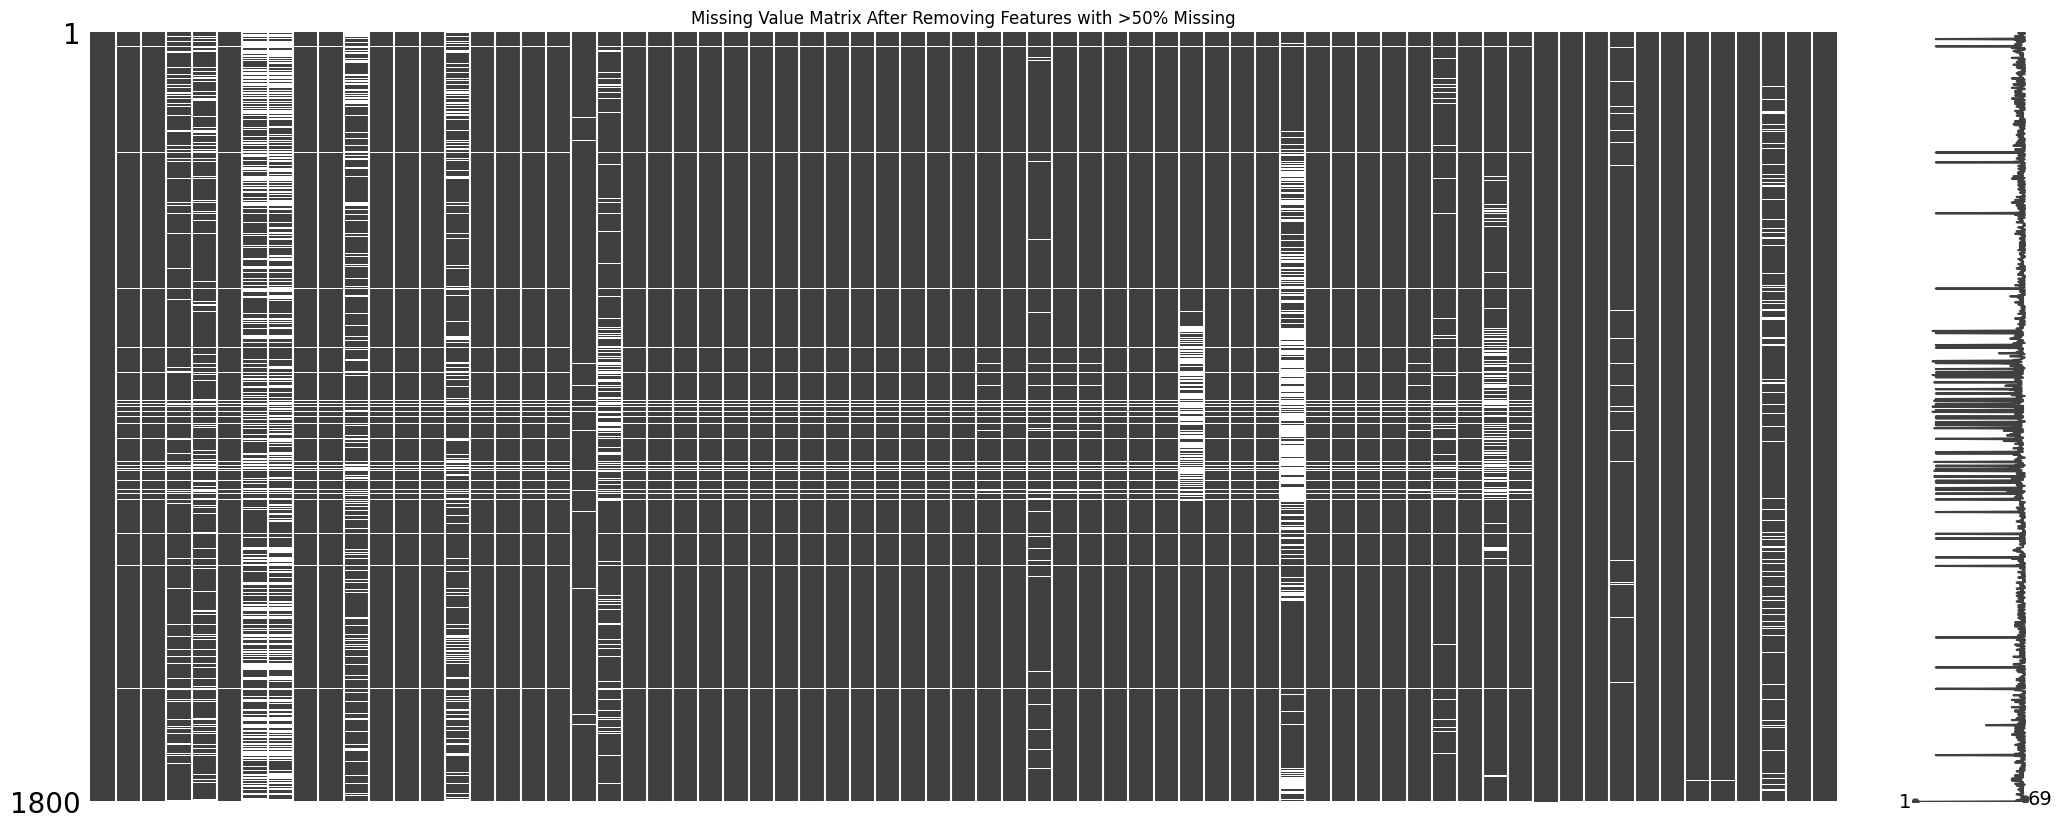

In [9]:
# 绘制缺失值分布图
plt.figure(figsize=(10, 6))
msno.matrix(df_filtered)
plt.title('Missing Value Matrix After Removing Features with >50% Missing')
plt.show()

## 3.2 Imputing missing data

In [10]:
# 读取数据
df = pd.read_csv('stoxx_1800_filtered.csv')

# 提取出 'Market' 和 'Type' 列
market_type_df = df[['Market', 'Type']]

# 删除 'Market' 和 'Type' 列以便填补其他列
df_filtered = df.drop(columns=['Market', 'Type'])

# 筛选出所有类别特征（非数值型）列
categorical_columns = df_filtered.select_dtypes(include=['object']).columns

# 用众数填补所有类别特征
for col in categorical_columns:
    df_filtered[col].fillna(df_filtered[col].mode()[0], inplace=True)

# 将 'Market' 和 'Type' 列重新添加到填补后的数据中
df_filled = pd.concat([df_filtered, market_type_df], axis=1)

# 保存填补后的数据
df_filled.to_csv('stoxx_1800_filled_categorical.csv', index=False)

/var/folders/05/h3y62cj93rd_ycz0gmx05l2w0000gn/T/ipykernel_96819/1367870241.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered[col].fillna(df_filtered[col].mode()[0], inplace=True)


Index(['CO2 Equivalent Emissions Total -YoY',
       'Emission Reduction Target Percentage', 'Waste Total',
       'Waste Recycling Ratio', 'Energy Use Total', 'EMPLOYEES NUMBER',
       'Women Employees', 'Product Responsibility Score',
       'Value - Board Structure/Board Diversity',
       'Board Meeting Attendance Average', 'Board Size',
       'Value - Board Structure/Specific Skills',
       'Value - Board Functions/Audit Committee Independence',
       'Executive Members Gender Diversity', 'ESG Reporting Scope',
       'Value - Board Structure/Independent Board Members', 'CASH FLOW/SALES',
       'NET SALES OR REVENUES', 'CURRENT EV / 12M FWD SALES',
       'SALES PER SHARE', 'NET INCOME - BASIC', 'FY1 EPS MEAN EST',
       'FY2 EPS MEAN EST', 'TOTAL ASSETS', 'GROSS PROFIT MARGIN',
       'RETURN ON ASSETS', 'FREE CASH FLOW PER SHARE', 'Type'],
      dtype='object')


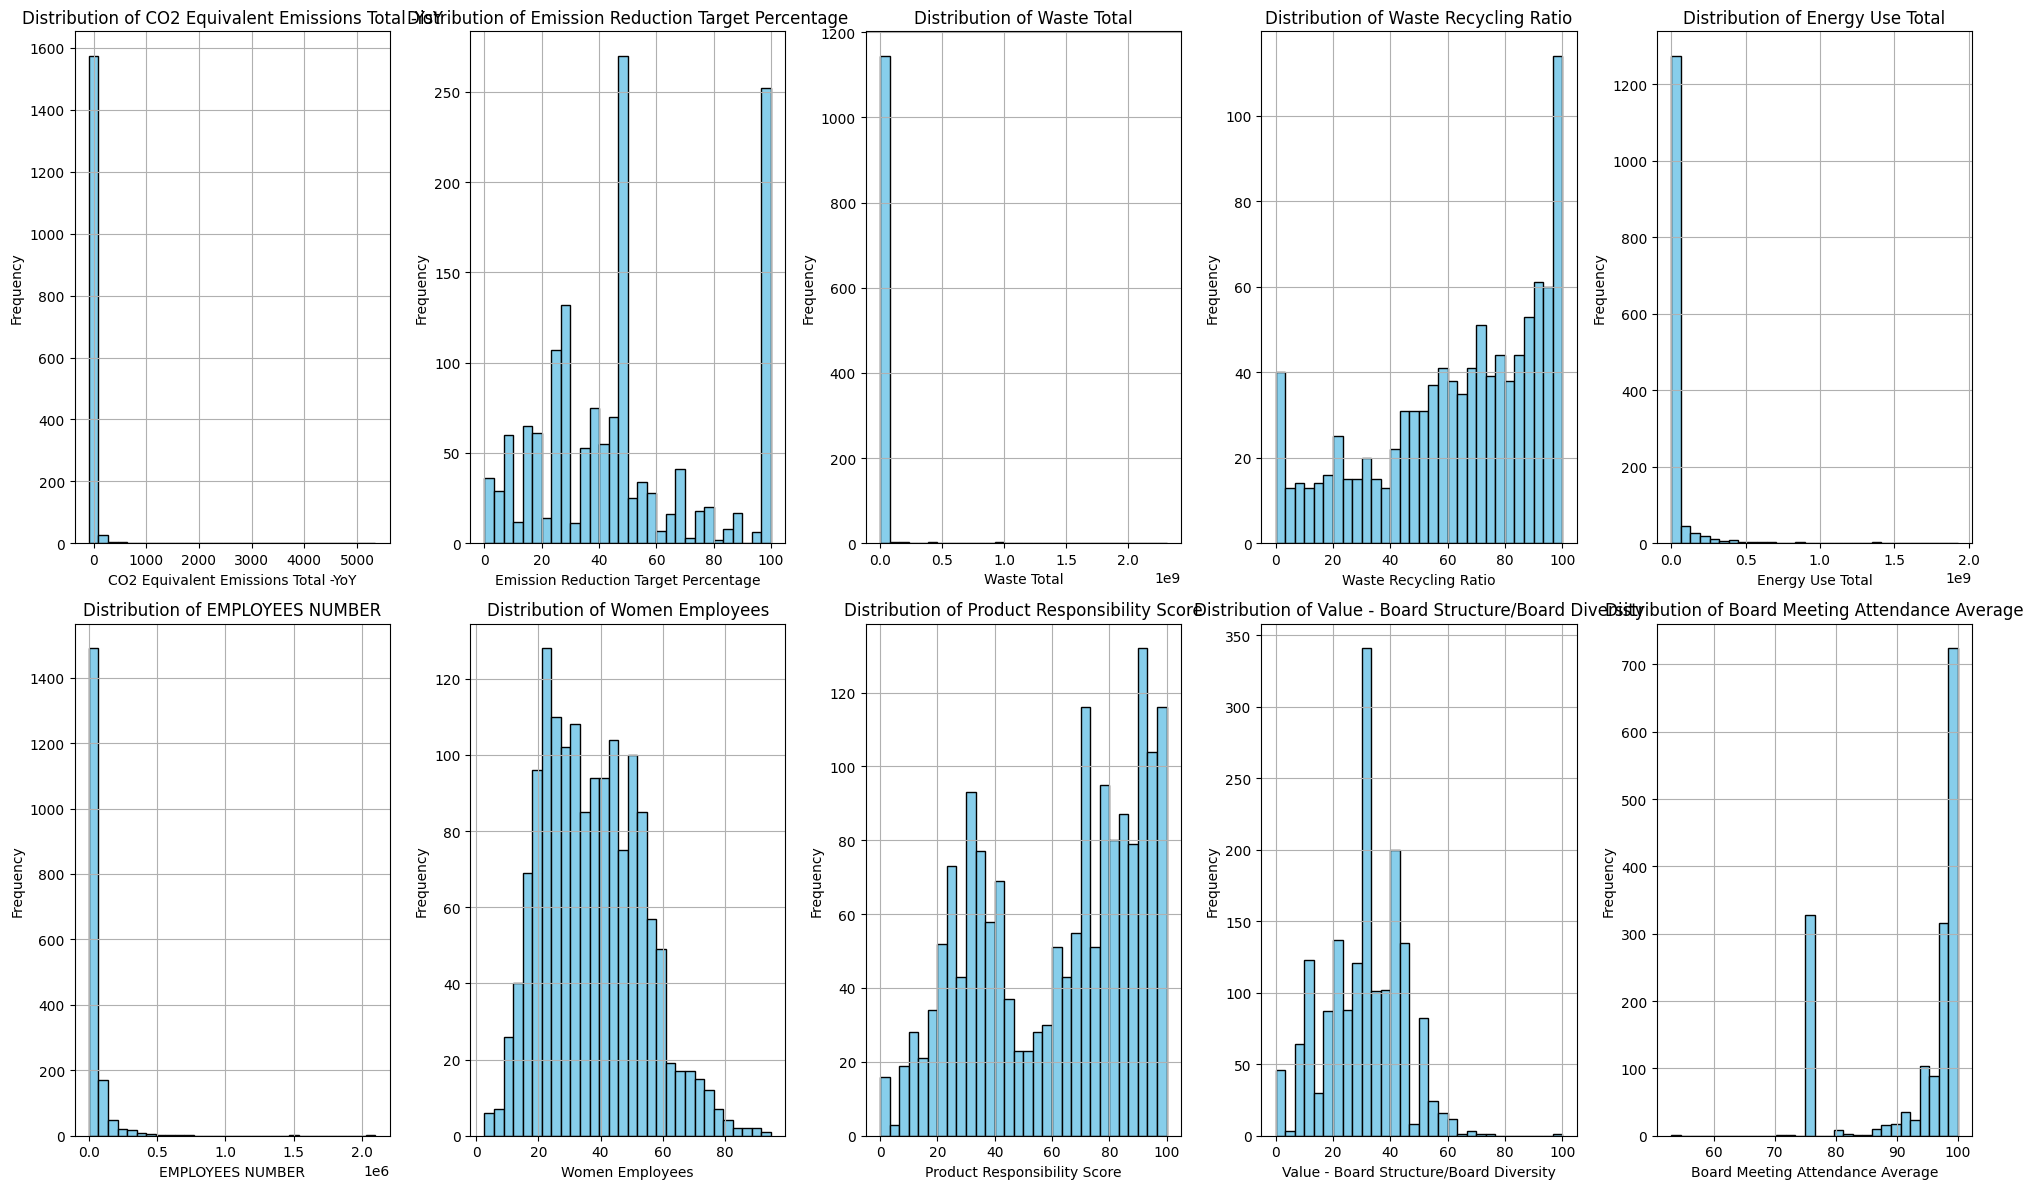

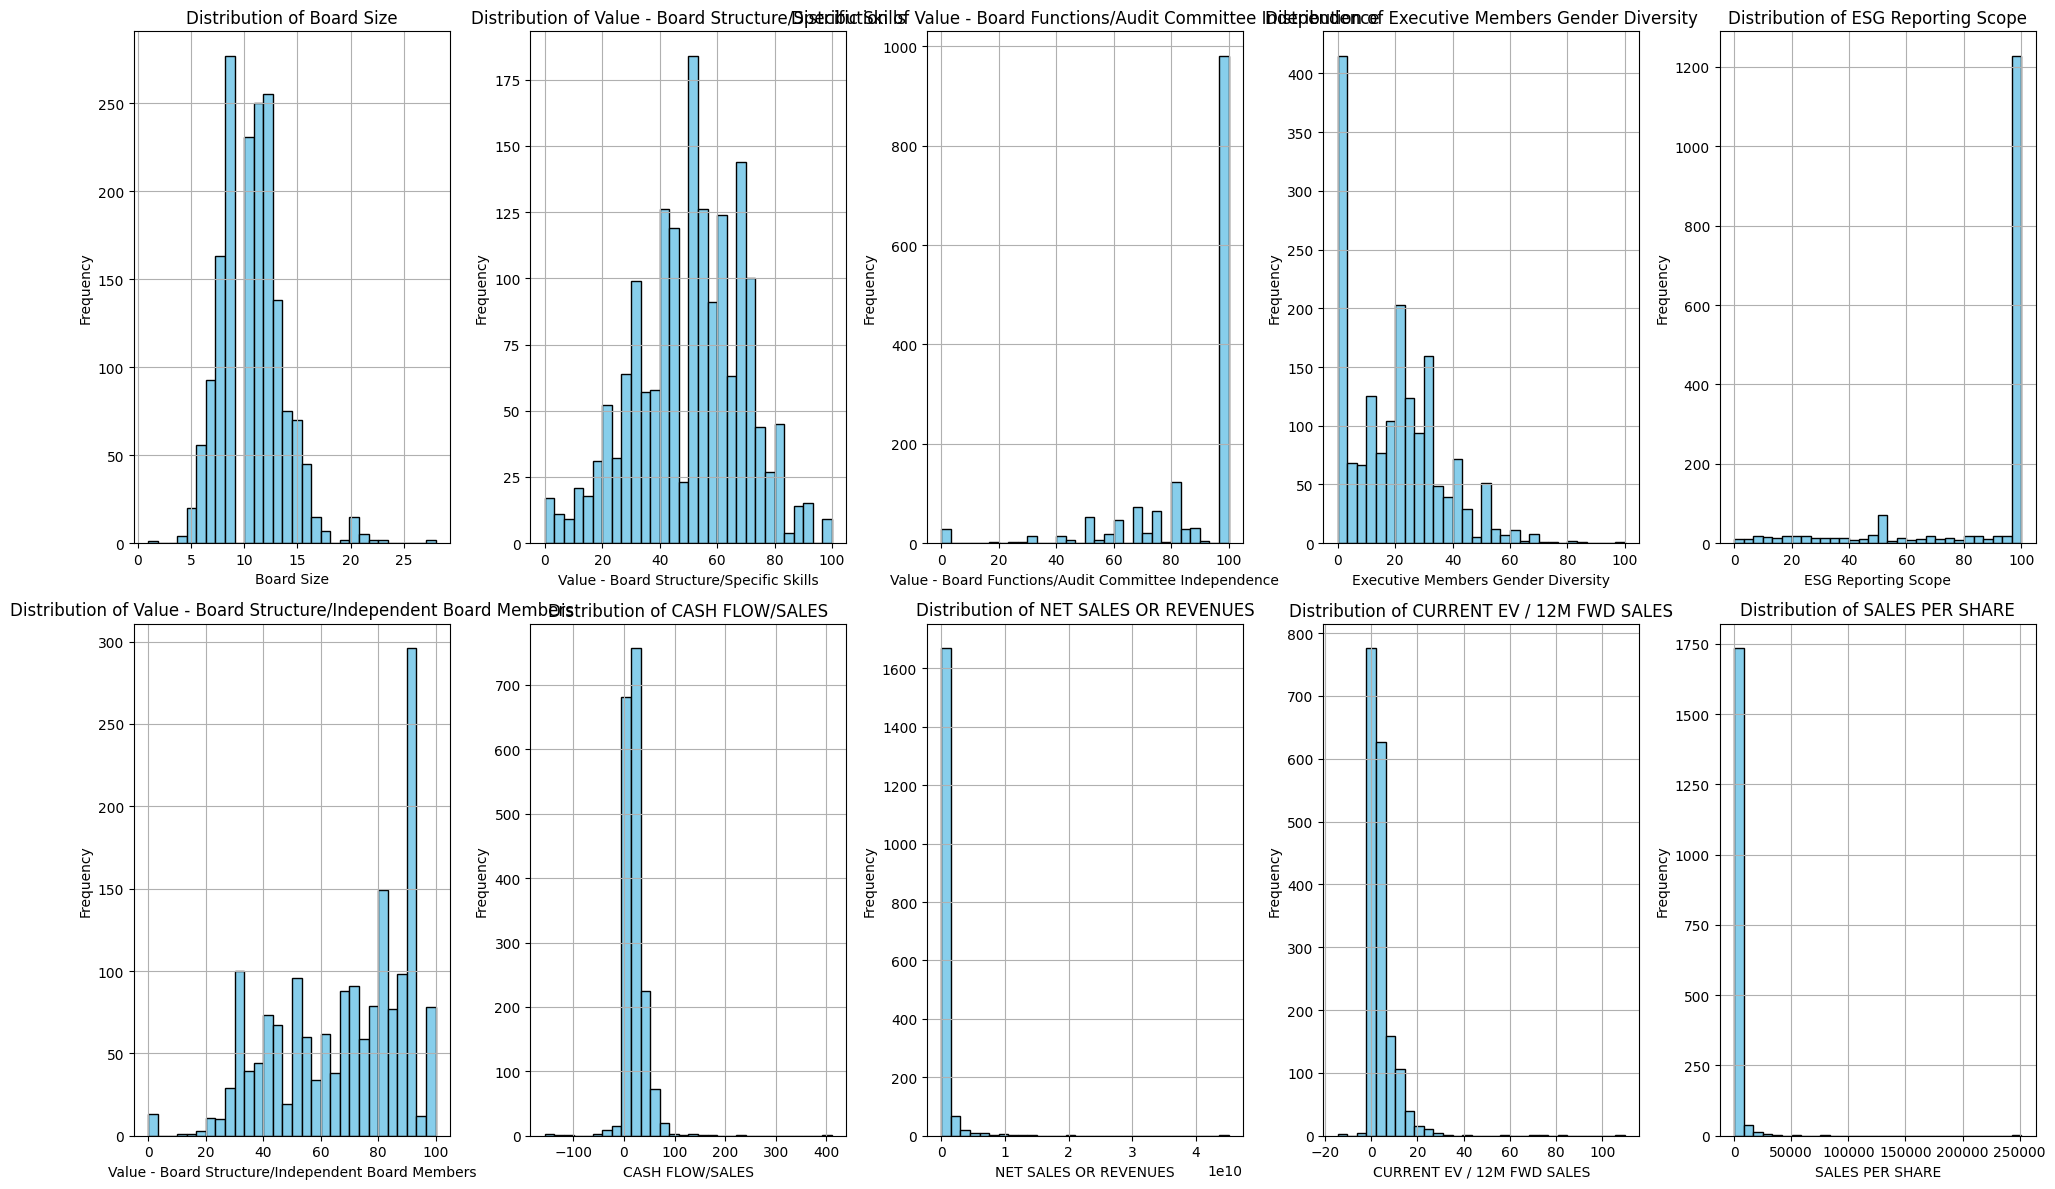

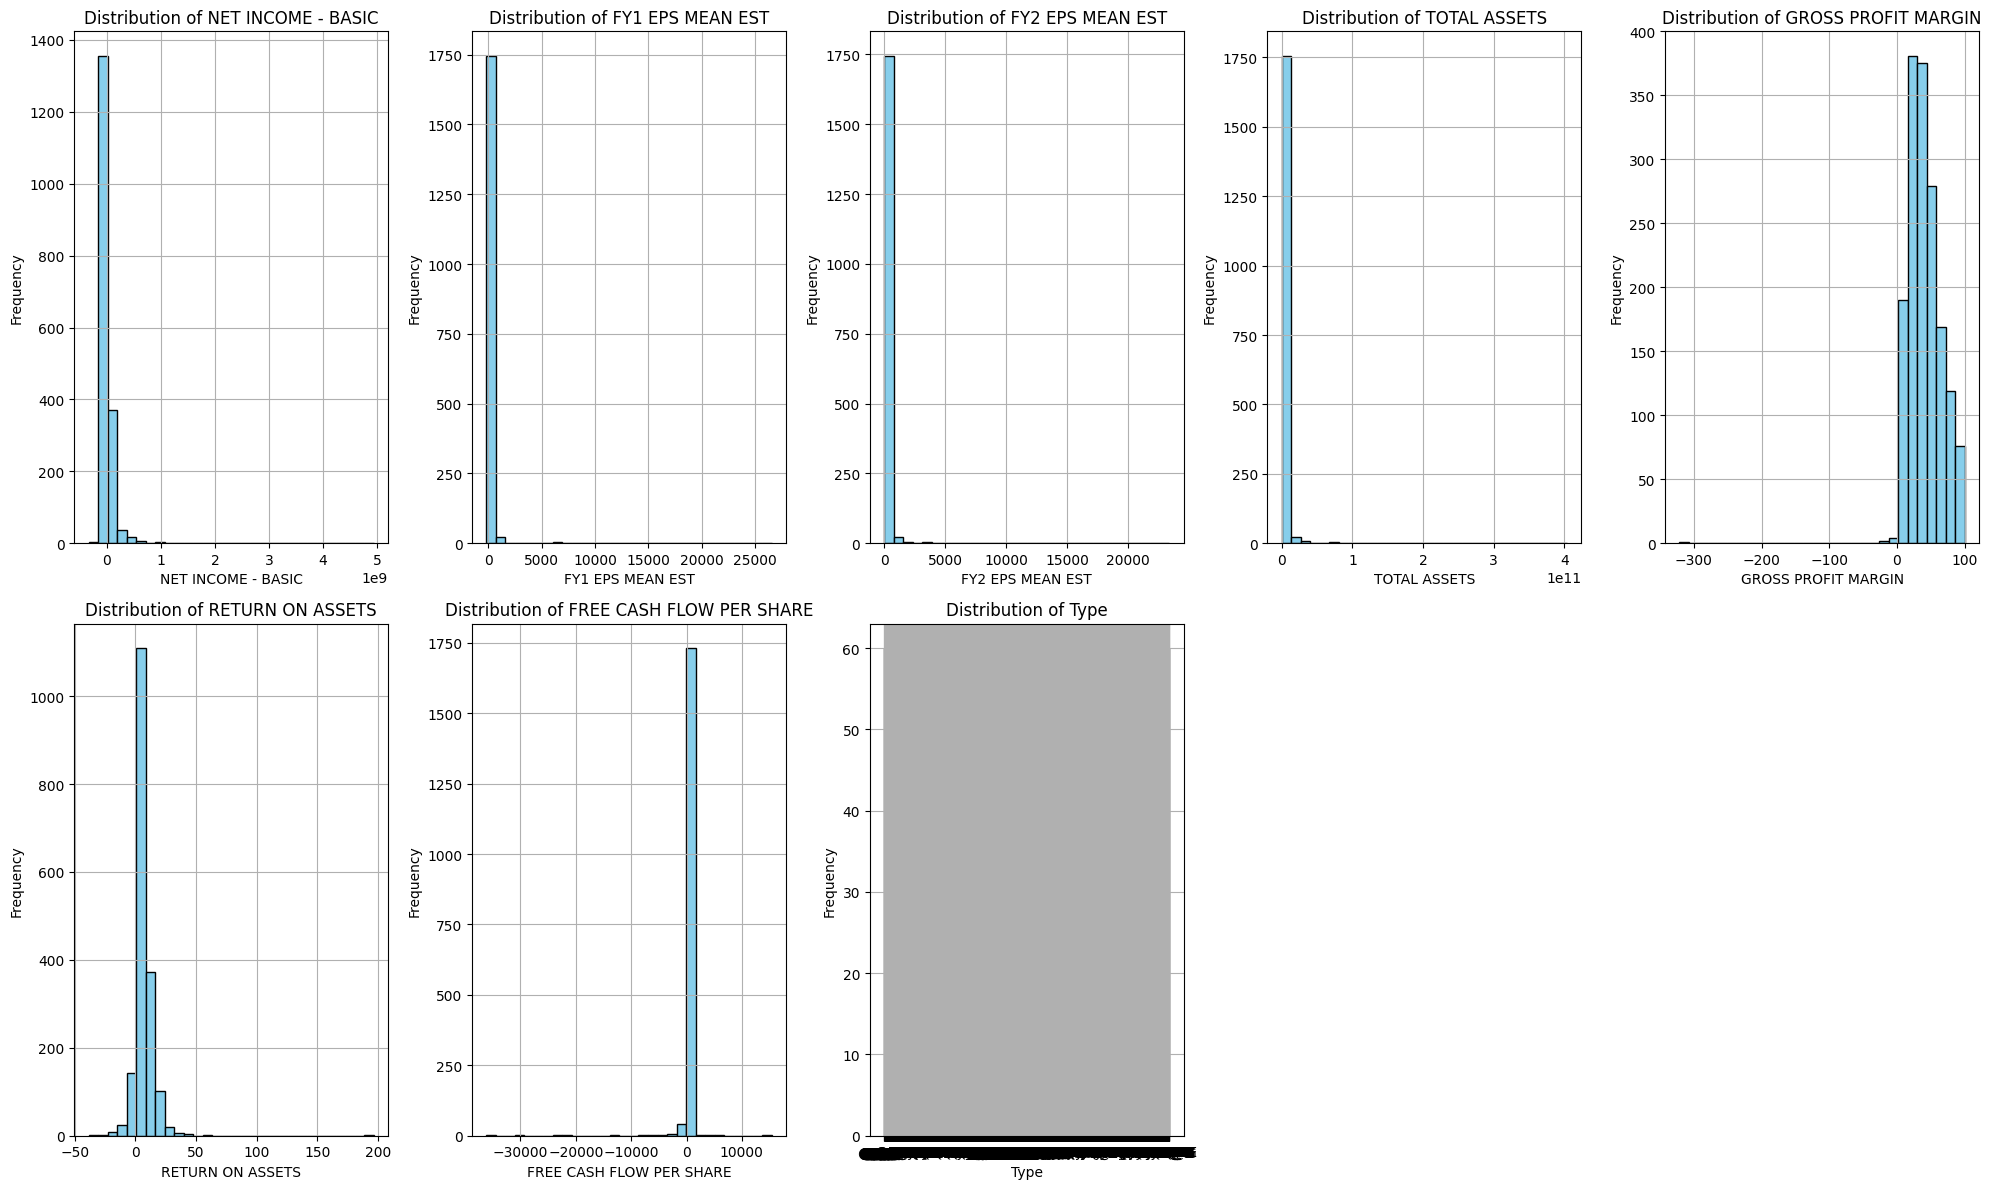

In [11]:
# 筛选出包含缺失值的列
columns_with_missing = df_filled.columns[df_filled.isnull().any()]
print(columns_with_missing)

# 分批显示每组10列
batch_size = 10
for i in range(0, len(columns_with_missing), batch_size):
    plt.figure(figsize=(20, 12))
    for j, column in enumerate(columns_with_missing[i:i + batch_size], 1):
        plt.subplot(2, 5, j)  # 调整每行的子图数量
        df_filled[column].dropna().hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [13]:
df = pd.read_csv('stoxx_1800_filled_categorical.csv')
# 提取出 'Market' 和 'Type' 列
market_type_df = df[['Market', 'Type']]

# 删除 'Market' 和 'Type' 列以便填补其他列
df_filtered = df.drop(columns=['Market', 'Type'])

# 用中位数填补偏态分布的数值特征
median_fill_columns = ['CO2 Equivalent Emissions Total -YoY', 'Waste Total', 'Energy Use Total', 'EMPLOYEES NUMBER', 'Value - Board Structure/Board Diversity', 'Board Size','Value - Board Functions/Audit Committee Independence','Executive Members Gender Diversity','ESG Reporting Scope','Value - Board Structure/Independent Board Members',
                       'CASH FLOW/SALES','NET SALES OR REVENUES','CURRENT EV / 12M FWD SALES','SALES PER SHARE','NET INCOME - BASIC','FY1 EPS MEAN EST',
       'FY2 EPS MEAN EST', 'TOTAL ASSETS', 'GROSS PROFIT MARGIN',
       'RETURN ON ASSETS', 'FREE CASH FLOW PER SHARE']
for col in median_fill_columns:
    df_filtered[col].fillna(df_filtered[col].median(), inplace=True)

# 用均值填补接近正态分布的数值特征
mean_fill_columns = ['Women Employees', 'Product Responsibility Score','Value - Board Structure/Specific Skills']
for col in mean_fill_columns:
    df_filtered[col].fillna(df_filtered[col].mean(), inplace=True)

# 用中位数填补多峰或不规则分布的数值特征
custom_fill_columns = ['Emission Reduction Target Percentage', 'Waste Recycling Ratio', 'Board Meeting Attendance Average']
for col in custom_fill_columns:
    df_filtered[col].fillna(df_filtered[col].median(), inplace=True)

# 将 'Market' 和 'Type' 列重新添加到填补后的数据中
df_filled = pd.concat([df_filtered, market_type_df], axis=1)

# 保存填补后的数据
df_filled.to_csv('stoxx_1800_filled_numerical.csv', index=False)

/var/folders/05/h3y62cj93rd_ycz0gmx05l2w0000gn/T/ipykernel_96819/3074859598.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered[col].fillna(df_filtered[col].median(), inplace=True)
/var/folders/05/h3y62cj93rd_ycz0gmx05l2w0000gn/T/ipykernel_96819/3074859598.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

# 4. Feature Engineering

In [27]:
# combing esg score
df_filled = pd.read_csv('stoxx_1800_filled_numerical.csv')
df_esg_score = pd.read_csv('stoxx_1800_esg_score.csv')
# 假设使用 'Symbol' 列作为唯一标识进行合并
merged_df = pd.merge(df_filled, df_esg_score[['Type', 'ESG Controversies Score', 'ESG Score']], on='Type', how='left')

# 保存合并后的数据
merged_df.to_csv('stoxx_1800_filled_combined_with_esg.csv', index=False)


In [28]:
# 删除缺失Type和ESG Score的行
data_cleaned = merged_df.dropna(subset=['ESG Score','Type'])
data_cleaned.shape
data_cleaned.to_csv('stoxx_1800_filled_combined_with_esg_cleaned.csv', index=False)

## 4.1 Encoding classify variables

In [36]:
data_encoded = data_cleaned.copy()

# 对数据中的每个列进行检测，如果是object类型且不是 'Type' 或 'Market'，则进行编码
for column in data_encoded.select_dtypes(include=['object']).columns:
    if column not in ['Type', 'Market']:
        # 创建LabelEncoder
        le = LabelEncoder()
        # 对列进行编码
        data_encoded[column] = le.fit_transform(data_encoded[column])

# 检查编码后的数据
print(data_encoded.head())
data_encoded.to_csv('stoxx_1800_filled_combined_with_esg_cleaned_encoded.csv', index=False)

   Environment Management Team  Environment Management Training  \
0                            1                                1   
1                            0                                0   
2                            1                                1   
3                            0                                0   
4                            1                                1   

   CO2 Equivalent Emissions Total -YoY  Emission Reduction Target Percentage  \
0                                 5.87                                  75.0   
1                                18.98                                 100.0   
2                                -0.12                                 100.0   
3                                -3.62                                 100.0   
4                                -8.19                                  27.0   

   Emissions Trading  Waste Total  Waste Recycling Ratio  \
0                  1      57417.0                  71.00

## 4.2 Correlation matirx between features

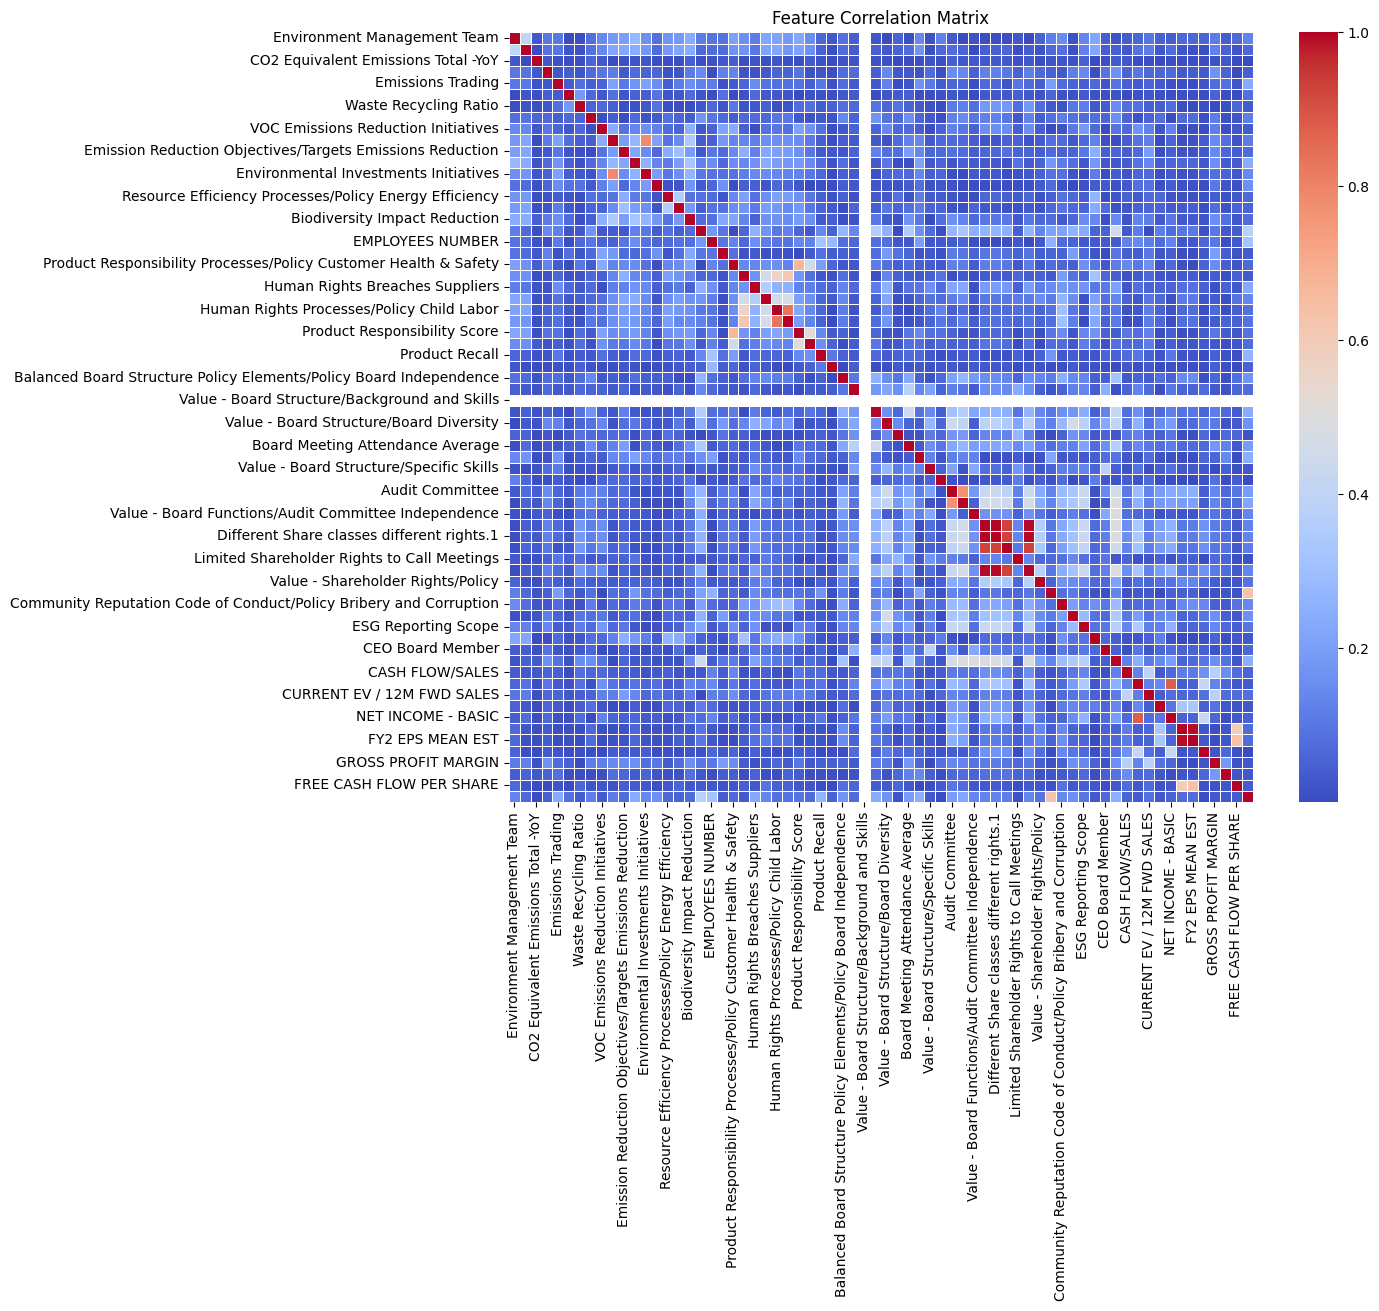

In [37]:
# 热力图
# 选择除了 'Type', 'Market', 和 'ESG Score' 之外的特征列
data = pd.read_csv('stoxx_1800_filled_combined_with_esg_cleaned_encoded.csv')
features = data.drop(columns=['Type', 'Market', 'ESG Score'])

# 计算相关性矩阵
correlation_matrix = features.corr().abs()

# 设置图形大小
plt.figure(figsize=(12, 10))

# 使用seaborn绘制热力图
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# 设置标题
plt.title("Feature Correlation Matrix")

# 显示图像
plt.show()

In [38]:
#找到高相关性特征对的上三角矩阵
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 根据相关性阈值（例如 0.9）识别高相关的特征
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(high_corr_features)
# 删除高相关的特征
features_reduced = data.drop(columns=high_corr_features)
features_reduced.to_csv('stoxx_1800_features_reduced.csv', index=False)

# 检查特征删除后的形状
print("特征删除后的形状:", features_reduced.shape)

['Different Share classes different rights.1', 'Value - Shareholder Rights/Voting Rights', 'Shareholder Rights Policy Elements/Policy Equal Voting Right', 'FY2 EPS MEAN EST']
特征删除后的形状: (1736, 67)


## 4.3 Correlation to Target

In [42]:
#correlation to target
data = pd.read_csv('stoxx_1800_features_reduced.csv')
# 去掉非特征列 'Type' 和 'Market'
data_features= data.drop(columns=['Type', 'Market'])


# 计算每个特征与 'ESG Score' 的相关系数
correlations = data_features.corr()['ESG Score'].abs().sort_values(ascending=False)
# 转换为 DataFrame 并保存为 CSV 文件
correlations_df = correlations.reset_index()
correlations_df.columns = ['Feature', 'Correlation']
correlations_df.to_csv('correlation.csv', index=False)

# 输出相关系数
print(correlations)

# 输出相关系数
print(correlations)


ESG Score                                        1.000000
Product Responsibility Score                     0.510667
Human Rights Suppliers                           0.490901
Human Rights Processes/Policy Child Labor        0.479604
Human Rights Processes/Policy Forced Labor       0.464346
                                                   ...   
NET INCOME - BASIC                               0.021453
Emission Reduction Target Percentage             0.013581
ESG Reporting Scope                              0.011471
TOTAL ASSETS                                     0.003873
Value - Board Structure/Background and Skills         NaN
Name: ESG Score, Length: 65, dtype: float64
ESG Score                                        1.000000
Product Responsibility Score                     0.510667
Human Rights Suppliers                           0.490901
Human Rights Processes/Policy Child Labor        0.479604
Human Rights Processes/Policy Forced Labor       0.464346
                            

In [43]:
# 选择相关性小于 0.1 的特征
dropped_features = correlations[correlations < 0.1].index

# 从数据集中删除这些特征
X_selected = data.drop(columns=dropped_features)
X_selected.to_csv('stoxx_1800_features_selected.csv', index=False)

# 查看筛选后的特征集
print(X_selected.shape)

(1736, 48)


In [3]:
data = pd.read_csv('stoxx_1800_features_selected.csv')
# 指定要删除的列
columns_to_drop = [
    'Human Rights Breaches Suppliers',
    'Environment Management Team', 
    'Audit Committee', 
    'Value - Community/Bribery Corruption and Fraud Controversies'
]

# 删除指定的列
data_reduced = data.drop(columns=columns_to_drop)

# 检查删除后的数据集
print(data_reduced.head())
data_reduced.to_csv('stoxx_1800_features_selected_reduced.csv', index=False)

   Environment Management Training  Emissions Trading  \
0                                1                  1   
1                                0                  0   
2                                1                  1   
3                                0                  0   
4                                1                  0   

   e-Waste Reduction Initiatives  VOC Emissions Reduction Initiatives  \
0                              1                                    1   
1                              0                                    0   
2                              0                                    0   
3                              1                                    0   
4                              0                                    0   

   Value - Emission Reduction/Environmental Expenditures  \
0                                                  1       
1                                                  0       
2                                     

In [4]:


# 读取数据
data = pd.read_csv('stoxx_1800_features_selected_reduced.csv')

# 去掉非特征列 'Type' 和 'Market'
data_features = data.drop(columns=['Type', 'Market'])

# 删除只有一个唯一值的列
single_value_columns = [col for col in data_features.columns if data_features[col].nunique() == 1]
data_features = data.drop(columns=single_value_columns)

# 筛选数值型列后，再删除方差小于阈值的列
variance_threshold = 0.01
numeric_features = data_features.select_dtypes(include=[float, int])  # 只选择数值型列
low_variance_columns = [col for col in numeric_features.columns if numeric_features[col].var() <= variance_threshold]

# 从 data_features 中删除低方差列
data_features = data.drop(columns=low_variance_columns)

# 打印被删除的列
print("删除的列（只有一个唯一值）:", single_value_columns)
print("删除的列（方差小于阈值）:", low_variance_columns)
data_features.to_csv('stoxx_1800_features_selected_reduced_variance.csv', index=False)


删除的列（只有一个唯一值）: ['Value - Board Structure/Background and Skills']
删除的列（方差小于阈值）: []


# 5. WorldBank data

# 6. Combing esg data and worldbank data

In [ ]:
#world_bank_data['Country Name'] = world_bank_data['Country Name'].replace('Hong Kong SAR, China', 'Hong Kong')

In [3]:
world_bank_data = pd.read_csv('world_bank_data_cleaned_suppliment.csv')


In [4]:
# merge the company data with the world bank data
data = pd.read_csv('stoxx_1800_features_selected_reduced_variance.csv')
# 使用 'Market' 列（公司信息）和 'Country Name' 列（World Bank 数据）进行合并
merged_all = pd.merge(data, world_bank_data, left_on='Market', right_on='Country Name', how='left')


# 查看合并后的数据形状和部分数据
print("合并后的数据形状：", merged_all.shape)
print(merged_all.head())

# 保存合并后的数据到新文件
merged_all.to_csv('merged_all_features_with_worldbank_v1.csv', index=False)

合并后的数据形状： (1736, 97)
   Environment Management Training  Emissions Trading  \
0                                1                  1   
1                                0                  0   
2                                1                  1   
3                                0                  0   
4                                1                  0   

   e-Waste Reduction Initiatives  VOC Emissions Reduction Initiatives  \
0                              1                                    1   
1                              0                                    0   
2                              0                                    0   
3                              1                                    0   
4                              0                                    0   

   Value - Emission Reduction/Environmental Expenditures  \
0                                                  1       
1                                                  0       
2                

In [5]:
# 检查 merged_features 中是否有缺失值
has_missing_values = merged_all.isnull().values.any()
if has_missing_values:
    print("数据中存在缺失值")
else:
    print("数据中没有缺失值")

数据中没有缺失值


# 7. World bank data correlation

In [6]:
# 读取文件
world_bank_data = pd.read_csv('world_bank_data_filled.csv')
merged_all_data = pd.read_csv('merged_all_features_with_worldbank_v1.csv')

# 确定哪些列在 merged_all_data 中出现并属于 world_bank_data
world_bank_columns = world_bank_data.columns
common_columns = [col for col in world_bank_columns if col in merged_all_data.columns and col != 'ESG Score']

# 计算相关性并按降序排列
correlations = merged_all_data[common_columns + ['ESG Score']].select_dtypes(include='number').corr()['ESG Score'].drop('ESG Score')
sorted_correlations = correlations.sort_values(ascending=False)

# 显示结果
print(sorted_correlations)

Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS]                                      0.245741
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                 0.201897
Proportion of bodies of water with good ambient water quality [EN.H2O.BDYS.ZS]                                      0.199386
Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS]               0.184038
Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]                               0.177803
Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]                                0.159586
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                                                           0.116278
Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]                                 0.101871


# 6 Convert to ESG rating

In [7]:
data = pd.read_csv('merged_all_features_with_worldbank_v1.csv')
def categorize_esg(score):
    if score <= 25:
        return 'D'  # First Quartile
    elif 25 < score <= 50:
        return 'C'  # Second Quartile
    elif 50 < score <= 75:
        return 'B'  # Third Quartile
    elif score > 75:
        return 'A'  # Fourth Quartile

# 创建一个新的列来存储分类结果
data['ESG_Rating'] = data['ESG Score'].apply(categorize_esg)

# 统计每个类别的数量
category_counts = data['ESG_Rating'].value_counts()

# 打印每个类别的记录数量
print(category_counts)

ESG_Rating
B    929
A    503
C    274
D     30
Name: count, dtype: int64


In [8]:
# 删除 'ESG Score' 列
data.drop(columns=['ESG Score','Country Code'], inplace=True)

data.to_csv('data_to_fit_v3.csv', index=False)

In [9]:
data.shape

(1736, 96)